# Assignment 5

In [1]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

import os, time

In [2]:
def print_image(img, n_channels=3, isGray=False, title="Image"):
    '''
    Prints the image using `matplotlib`.

    - if isGray is False and n_channels=3, the image is colored, and is printed as it is
    - if isGray is True and n_channels = 3, the image is first converted to grayscale, and then printed as a black and white image
    - if isGray is True/False and n_channels = 1, the image is printed as a black and white image
    '''

    if n_channels == 1: # single channel image
        plt.figure(figsize=(5,5))
        plt.imshow(img, cmap='gray')
        plt.axis(False)
        plt.title(title)
        plt.show()
    else: # n_channels == 3; multi-channel image
        if isGray: # convert to grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            plt.figure(figsize=(5,5))
            plt.imshow(img_gray, cmap='gray')
            plt.axis(False)
            plt.title(title)
            plt.show()
        else: # colored image
            img_colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(5,5))
            plt.imshow(img_colored)
            plt.axis(False)
            plt.title(title)
            plt.show()

# 1.

## 1.(c) Problem 4.21

In [92]:
def strip_img(width=2, shape=(200,200)):
    '''
    Creates a black and white image of shape (200, 200) with alternating stripes of black/white, each stripe being 'width' pixels wide.
    '''
    img = np.zeros(shape)
    
    is_white = True

    for i in range(0, shape[0], width):
        if not is_white:
            img[:,i:i+width] = 0
            is_white = True
        else:
            img[:,i:i+width] = 255
            is_white = False
    
    return img

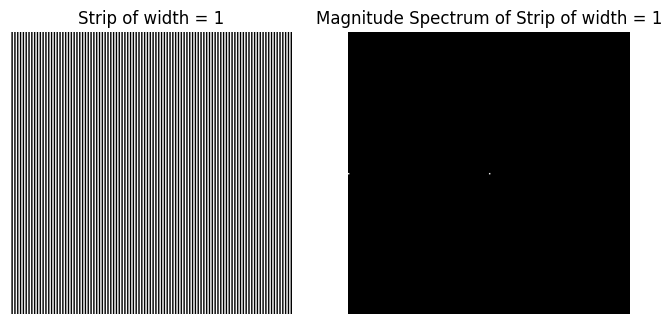

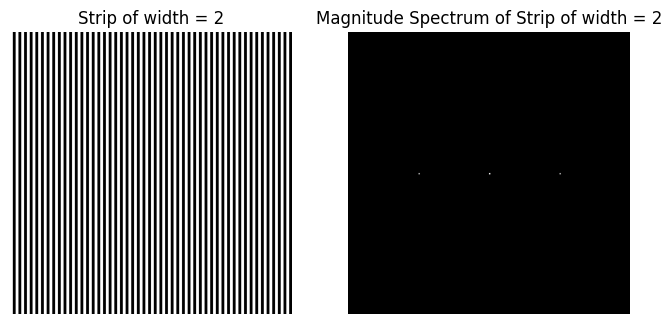

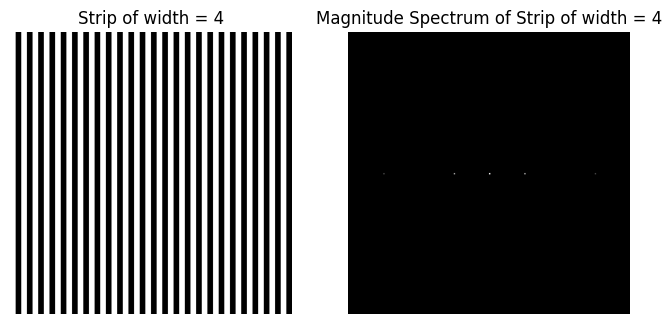

In [95]:
# show original image and magnitude spectrum (fourier spectrum) of stripped image of different widths

# create a list of widths
widths = [1, 2, 4]


# show the original image and its magnitude spectrum for each width in the list
for width in widths:
    img = strip_img(width=width)
    magnitude_spectrum = np.abs(np.fft.fftshift(np.fft.fft2(img)))

    # plot the images side by side
    plt.figure(figsize=(8,4))

    # strip of width='width'
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.axis(False)
    plt.title("Strip of width = {}".format(width))

    # magnitude spectrum of strip of width='width'
    plt.subplot(1,2,2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis(False)
    plt.title("Magnitude Spectrum of Strip of width = {}".format(width))

plt.show()

Based on the above observations, `dc` terms in both the images (with width `1` pixel and `4` pixels) are the same since the central `dc` component is nothing but the average brightness of the image which is essentially the same for both cases.

# 2.

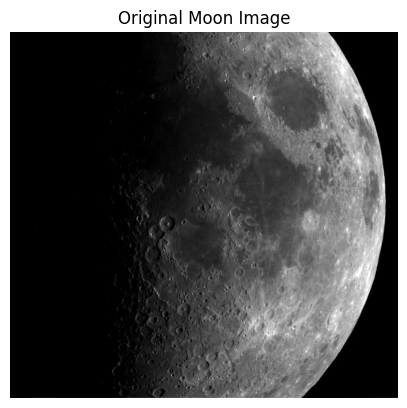

In [49]:
# moon image save_path
moon_save_path = os.path.join('data', 'Images', 'moon.jpg')

# read and print the moon image
moon_img = cv2.imread(moon_save_path, cv2.IMREAD_GRAYSCALE)
print_image(moon_img, n_channels=1, isGray=True, title="Original Moon Image")

## 2.(a)

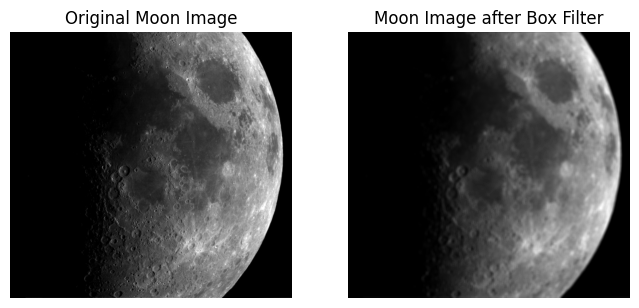

In [8]:
# side-by-side comparison of the original and image after applying box filter

# box filter with kernel size 7x7
moon_box_7 = cv2.boxFilter(moon_img, -1, (7,7))

# plot side-by-side comparison
plt.figure(figsize=(8,4))

# original moon image
plt.subplot(121)
plt.imshow(moon_img, cmap='gray')
plt.axis(False)
plt.title("Original Moon Image")

# moon image after applying box filter
plt.subplot(122)
plt.imshow(moon_box_7, cmap='gray')
plt.axis(False)
plt.title("Moon Image after Box Filter")

plt.show()

## 2.(b)

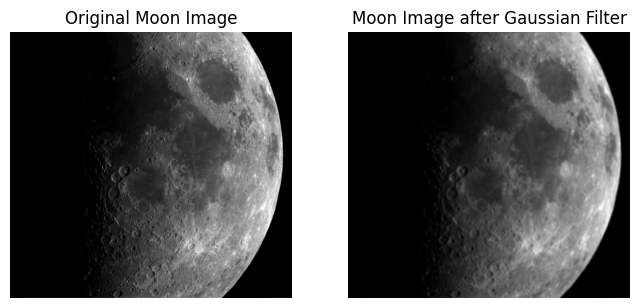

In [9]:
# side-by-side comparison of the original and image after applying Gaussian filter

# Gaussian filter with kernel size 7x7
moon_gauss = cv2.GaussianBlur(moon_img, (7,7), 0)

# plot side-by-side comparison
plt.figure(figsize=(8,4))

# original moon image
plt.subplot(121)
plt.imshow(moon_img, cmap='gray')
plt.axis(False)
plt.title("Original Moon Image")

# moon image after applying Gaussian filter
plt.subplot(122)
plt.imshow(moon_gauss, cmap='gray')
plt.axis(False)
plt.title("Moon Image after Gaussian Filter")

plt.show()

## 2.(c)

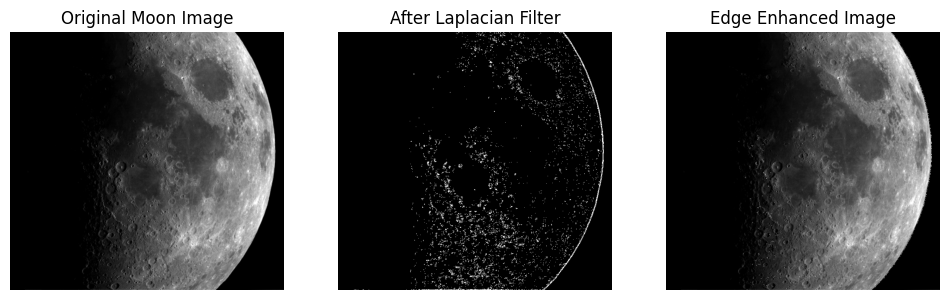

In [16]:
# side-by-side comparison of the original and image after applying Laplacian filter and enhanching the edges

# Laplacian filter
# apply laplacian filter
moon_lap = cv2.Laplacian(moon_img, cv2.CV_64F)
# convert the output to unsigned 8-bit integer
moon_lap = np.uint8(np.absolute(moon_lap))
# create a mask of the edges (by thresholding the laplacian image)
moon_lap = cv2.threshold(moon_lap, 50, 255, cv2.THRESH_BINARY)[1]

# enhance the edges
moon_lap_enhanced = moon_lap + moon_img

# plot side-by-side comparison
plt.figure(figsize=(12,4))

# original moon image
plt.subplot(131)
plt.imshow(moon_img, cmap='gray')
plt.axis(False)
plt.title("Original Moon Image")

# moon image after applying Laplacian filter
plt.subplot(132)
plt.imshow(moon_lap, cmap='gray')
plt.axis(False)
plt.title("After Laplacian Filter")

# moon image after applying Laplacian filter and enhancing the edges
plt.subplot(133)
plt.imshow(moon_lap_enhanced, cmap='gray')
plt.axis(False)
plt.title("Edge Enhanced Image")

plt.show()


## 2.(d)

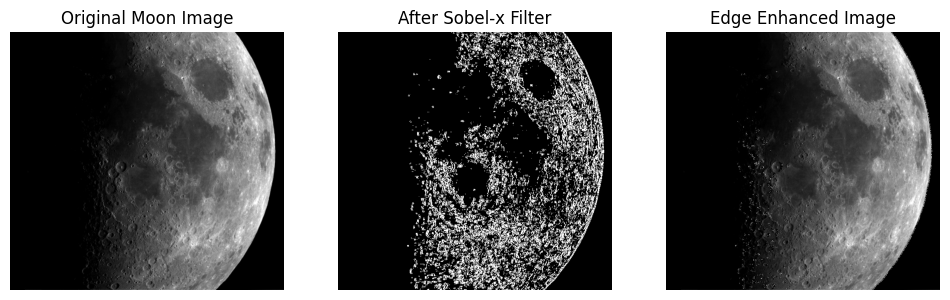

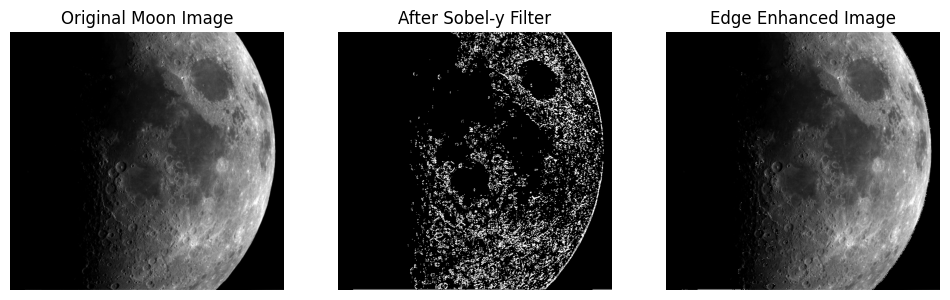

In [18]:
# side-by-side comparison of the original and image after applying Sobel filter and enhanching the edges

# sobel-x filter
# apply sobel-x filter
moon_sobel_x = cv2.Sobel(moon_img, cv2.CV_64F, 1, 0)
# convert the output to unsigned 8-bit integer
moon_sobel_x = np.uint8(np.absolute(moon_sobel_x))
# create a mask of the edges (by thresholding the sobel-x image)
moon_sobel_x = cv2.threshold(moon_sobel_x, 50, 255, cv2.THRESH_BINARY)[1]

# sobel-y filter
# apply sobel-y filter
moon_sobel_y = cv2.Sobel(moon_img, cv2.CV_64F, 0, 1)
# convert the output to unsigned 8-bit integer
moon_sobel_y = np.uint8(np.absolute(moon_sobel_y))
# create a mask of the edges (by thresholding the sobel-y image)
moon_sobel_y = cv2.threshold(moon_sobel_y, 50, 255, cv2.THRESH_BINARY)[1]

# enhance the edges
moon_sobel_x_enhanced = moon_sobel_x + moon_img
moon_sobel_y_enhanced = moon_sobel_y + moon_img

# plot side-by-side comparison for Sobel-x filter
plt.figure(figsize=(12,4))

# original moon image
plt.subplot(131)
plt.imshow(moon_img, cmap='gray')
plt.axis(False)
plt.title("Original Moon Image")

# moon image after applying Sobel-x filter
plt.subplot(132)
plt.imshow(moon_sobel_x, cmap='gray')
plt.axis(False)
plt.title("After Sobel-x Filter")

# moon image after applying Sobel-x filter and enhancing the edges
plt.subplot(133)
plt.imshow(moon_sobel_x_enhanced, cmap='gray')
plt.axis(False)
plt.title("Edge Enhanced Image")

plt.show()

# plot side-by-side comparison for Sobel-y filter
plt.figure(figsize=(12,4))

# original moon image
plt.subplot(131)
plt.imshow(moon_img, cmap='gray')
plt.axis(False)
plt.title("Original Moon Image")

# moon image after applying Sobel-y filter
plt.subplot(132)
plt.imshow(moon_sobel_y, cmap='gray')
plt.axis(False)
plt.title("After Sobel-y Filter")

# moon image after applying Sobel-y filter and enhancing the edges
plt.subplot(133)
plt.imshow(moon_sobel_y_enhanced, cmap='gray')
plt.axis(False)
plt.title("Edge Enhanced Image")

plt.show()

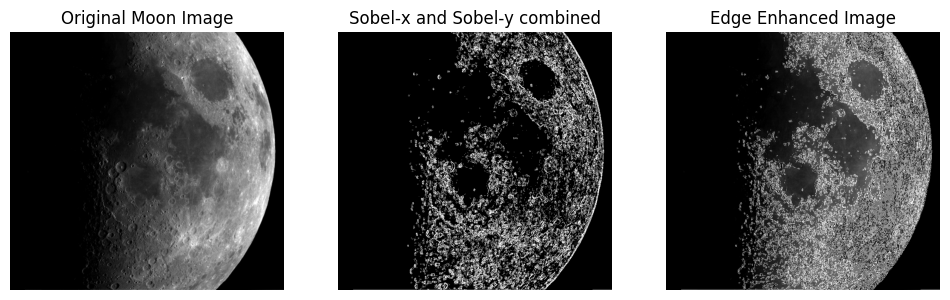

In [19]:
# side-by-side comparison of the original and image after applying Sobel-x and Sobel-y filters together to enhance the edges

# apply sobel-x and sobel-y filters together
sobel_combined = cv2.addWeighted(moon_sobel_x, 0.5, moon_sobel_y, 0.5, 0)
moon_sobel_combined = sobel_combined + moon_img

# plot side-by-side comparison
plt.figure(figsize=(12,4))

# original moon image
plt.subplot(131)
plt.imshow(moon_img, cmap='gray')
plt.axis(False)
plt.title("Original Moon Image")

# moon image after applying Sobel-x and Sobel-y filters together
plt.subplot(132)
plt.imshow(sobel_combined, cmap='gray')
plt.axis(False)
plt.title("Sobel-x and Sobel-y combined")

# moon image after applying Sobel-x and Sobel-y filters together and enhancing the edges
plt.subplot(133)
plt.imshow(moon_sobel_combined, cmap='gray')
plt.axis(False)
plt.title("Edge Enhanced Image")

plt.show()

# 3.

## 3.(a)

In [22]:
def make_rect(w=10,h=10):
    '''
    Creates image of size (100 x 100) with a white rectangle of size (w x h) at the center.
    '''
    # empty image
    img = np.zeros((100,100), dtype=np.uint8)

    # draw a white rectangle at the center of the image
    cv2.rectangle(img, (50-w//2, 50-h//2), (50+w//2, 50+h//2), 255, -1)

    return img

In [43]:
def display_spectrums(w=10, h=10):
    '''
    Displays the fourier transforms of the image created by make_rect() function (this creates a rectangle of size (w x h) at the center of the image).

    Also displays following spectrums:
    - Magnitude spectrum
    - Phase spectrum
    - Power spectrum
    '''
    # create image of size (100 x 100) with a white rectangle of size (w x h) at the center
    img = make_rect(w,h)

    # apply fourier transform
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    # shift the zero-frequency component to the center of the spectrum
    dft_shift = np.fft.fftshift(dft)

    # calculate the magnitude and phase spectrums
    magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1])
    
    # magnitude spectrum is in log scale
    magnitude_spectrum = np.log(1 + magnitude_spectrum)

    # calculate the power spectrum
    power_spectrum = np.square(magnitude_spectrum)

    # plot the images
    plt.figure(figsize=(16,4))

    # original image
    plt.subplot(141)
    plt.imshow(img, cmap='gray')
    plt.axis(False)
    plt.title("Original Image")

    # magnitude spectrum
    plt.subplot(142)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis(False)
    plt.title("Magnitude Spectrum")

    # phase spectrum
    plt.subplot(143)
    plt.imshow(phase_spectrum, cmap='gray')
    plt.axis(False)
    plt.title("Phase Spectrum")

    # power spectrum
    plt.subplot(144)
    plt.imshow(power_spectrum, cmap='gray')
    plt.axis(False)
    plt.title("Power Spectrum")

    plt.show()
    

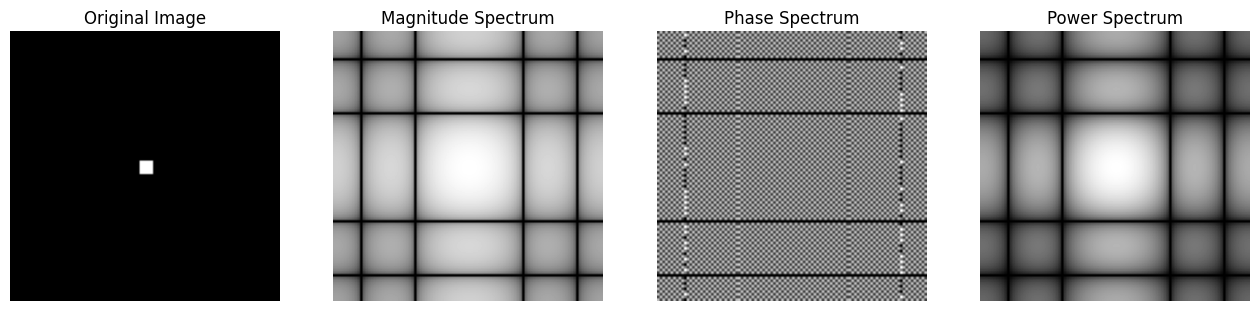

In [44]:
display_spectrums(5, 5)

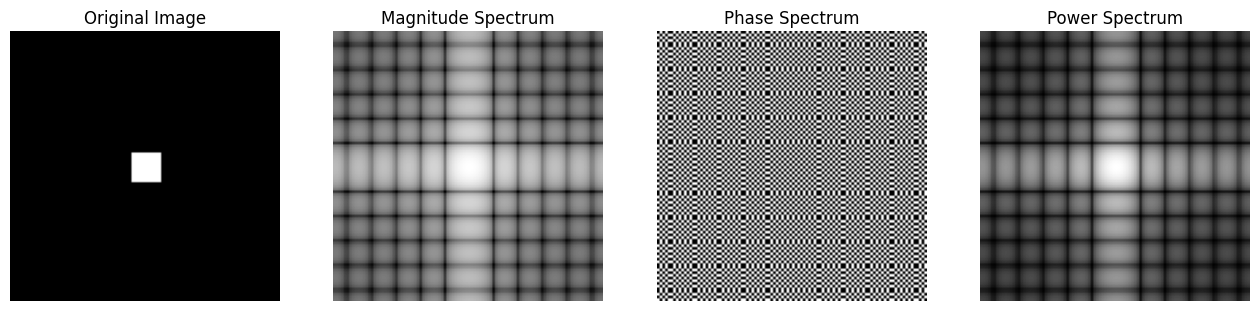

In [45]:
display_spectrums(10, 10)

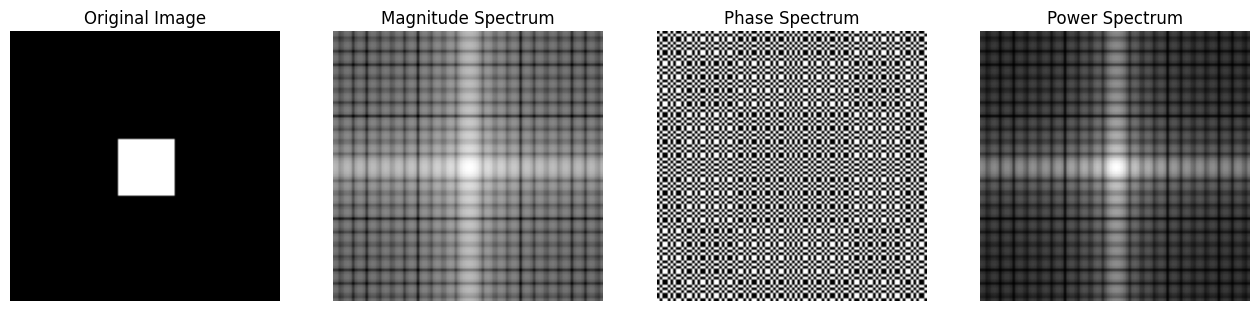

In [46]:
display_spectrums(20, 20)

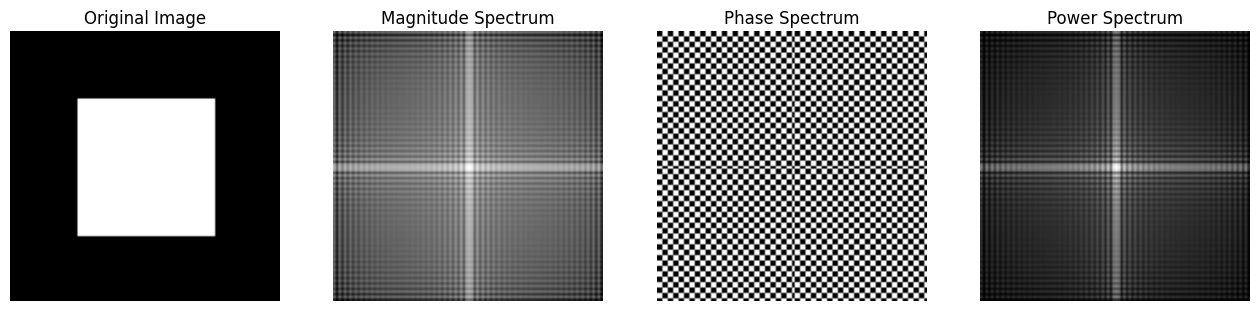

In [47]:
display_spectrums(50, 50)

## 3.(b)


- **Magnitude Spectrum:** Changing the size of the white rectangle in the center of the image has a significant impact on the spectral images. Increasing its dimensions results in a wider peak in the magnitude spectrum, while decreasing its dimensions produces a more distinct peak. This is due to the fact that a larger white rectangle includes more high-frequency components, which expand the spectral content across a broader frequency range. Conversely, a smaller white rectangle comprises fewer high-frequency components, leading to a more pointed peak in the magnitude spectrum.

- **Phase Spectrum:** However, altering the dimensions of the white rectangle has minimal impact on the phase spectrum. The phase spectrum is primarily determined by the spatial arrangement of the image, rather than its frequency content.

- **Power Spectrum:** The power spectrum is directly proportional to the square of the magnitude spectrum. Therefore, expanding the dimensions of the white rectangle results in a more widely dispersed power spectrum, while reducing its dimensions leads to a more focused power spectrum. These changes align with the variations observed in the magnitude spectrum.

In summary, the size of the white rectangle impacts the spectral images by altering the spatial frequency composition of the image. Increasing the size of the rectangle includes more high-frequency components, while reducing its size includes fewer high-frequency components.

# 4. Low Pass Filters

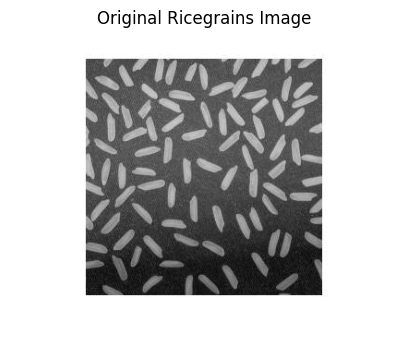

In [3]:
# comparison of low pass filters:
# Spatial Domain Filtering vs Frequency Domain Filtering

# ricegrains save_path
ricegrains_save_path = os.path.join('data', 'Images', 'ricegrains.jpg')

# read and print the ricegrains image
ricegrains_img = cv2.imread(ricegrains_save_path, cv2.IMREAD_GRAYSCALE)
print_image(ricegrains_img, n_channels=1, isGray=True, title="Original Ricegrains Image")

## 4.(a) Spatial Domain Filtering

In [6]:
# smoothing the image using different kernel sizes, to apply box filter, gaussian filter and median filter

kernel_sizes = [3, 5, 7]
sigma = 1.5

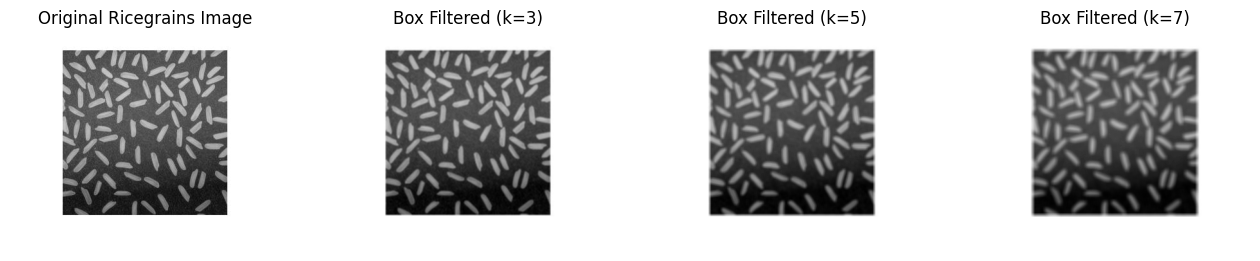

In [7]:
# box filter

plt.figure(figsize=(16,5))

# original image
plt.subplot(141)
plt.imshow(ricegrains_img, cmap='gray')
plt.axis(False)
plt.title("Original Ricegrains Image")

for k in kernel_sizes:
    # apply box filter
    box_filtered = cv2.boxFilter(ricegrains_img, -1, (k,k))
    # plot the image
    plt.subplot(1,4,kernel_sizes.index(k)+2)
    plt.imshow(box_filtered, cmap='gray')
    plt.axis(False)
    plt.title("Box Filtered (k={})".format(k))

plt.show()

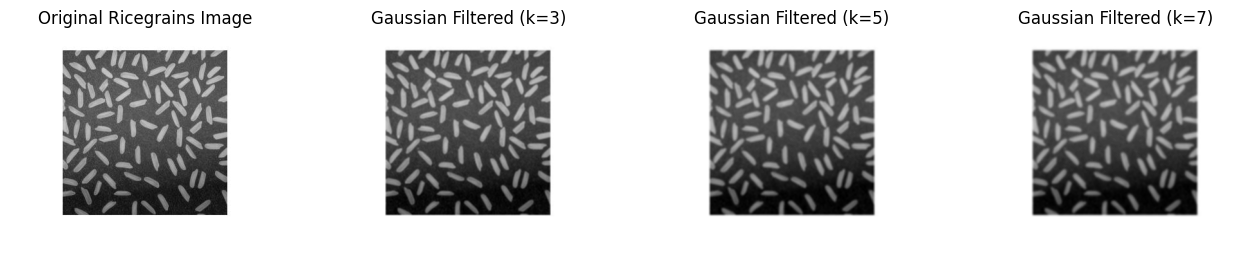

In [8]:
# gaussian filter

plt.figure(figsize=(16,5))

# original image
plt.subplot(141)
plt.imshow(ricegrains_img, cmap='gray')
plt.axis(False)
plt.title("Original Ricegrains Image")

for k in kernel_sizes:
    # apply gaussian filter
    gaussian_filtered = cv2.GaussianBlur(ricegrains_img, (k,k), sigma)
    # plot the image
    plt.subplot(1,4,kernel_sizes.index(k)+2)
    plt.imshow(gaussian_filtered, cmap='gray')
    plt.axis(False)
    plt.title("Gaussian Filtered (k={})".format(k))

plt.show()

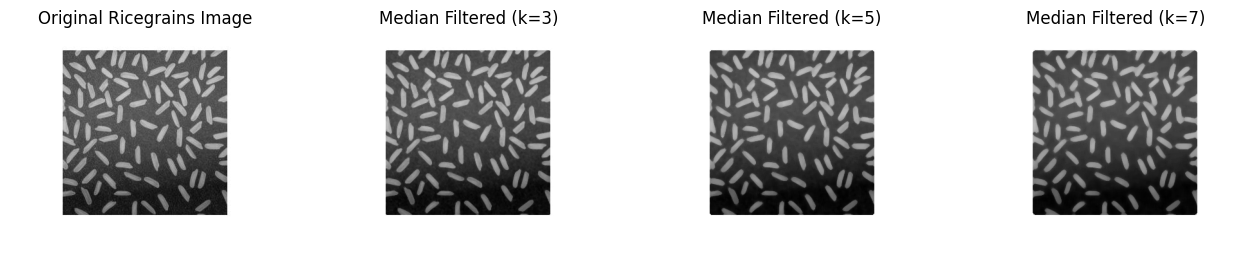

In [9]:
# median filter

plt.figure(figsize=(16,5))

# original image
plt.subplot(141)
plt.imshow(ricegrains_img, cmap='gray')
plt.axis(False)
plt.title("Original Ricegrains Image")

for k in kernel_sizes:
    # apply median filter
    median_filtered = cv2.medianBlur(ricegrains_img, k)
    # plot the image
    plt.subplot(1,4,kernel_sizes.index(k)+2)
    plt.imshow(median_filtered, cmap='gray')
    plt.axis(False)
    plt.title("Median Filtered (k={})".format(k))

plt.show()

## 4.(b) Frequency Domain Filtering

In [10]:
# butterworth low pass filter

def butterworth_lowpass_filter(img, radius, n):
    '''
    Applies butterworth low pass filter on the given image.
    '''
    # extract the image dimensions
    h,w = img.shape
    
    # apply fourier transform
    fshift = np.fft.fftshift(np.fft.fft2(img))

    # create the butterworth low pass filter
    H = np.zeros((h,w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            # calculate the distance of each pixel from the center
            distance = np.sqrt((i-h//2)**2 + (j-w//2)**2)
            # calculate the butterworth low pass filter
            H[i,j] = 1 / (1 + (distance/radius)**(2*n))
    
    # apply the filter
    fshift_filtered = fshift * H

    # apply inverse fourier transform
    img_filtered = np.fft.ifft2(fshift_filtered)

    # return the filtered image
    return np.abs(img_filtered)


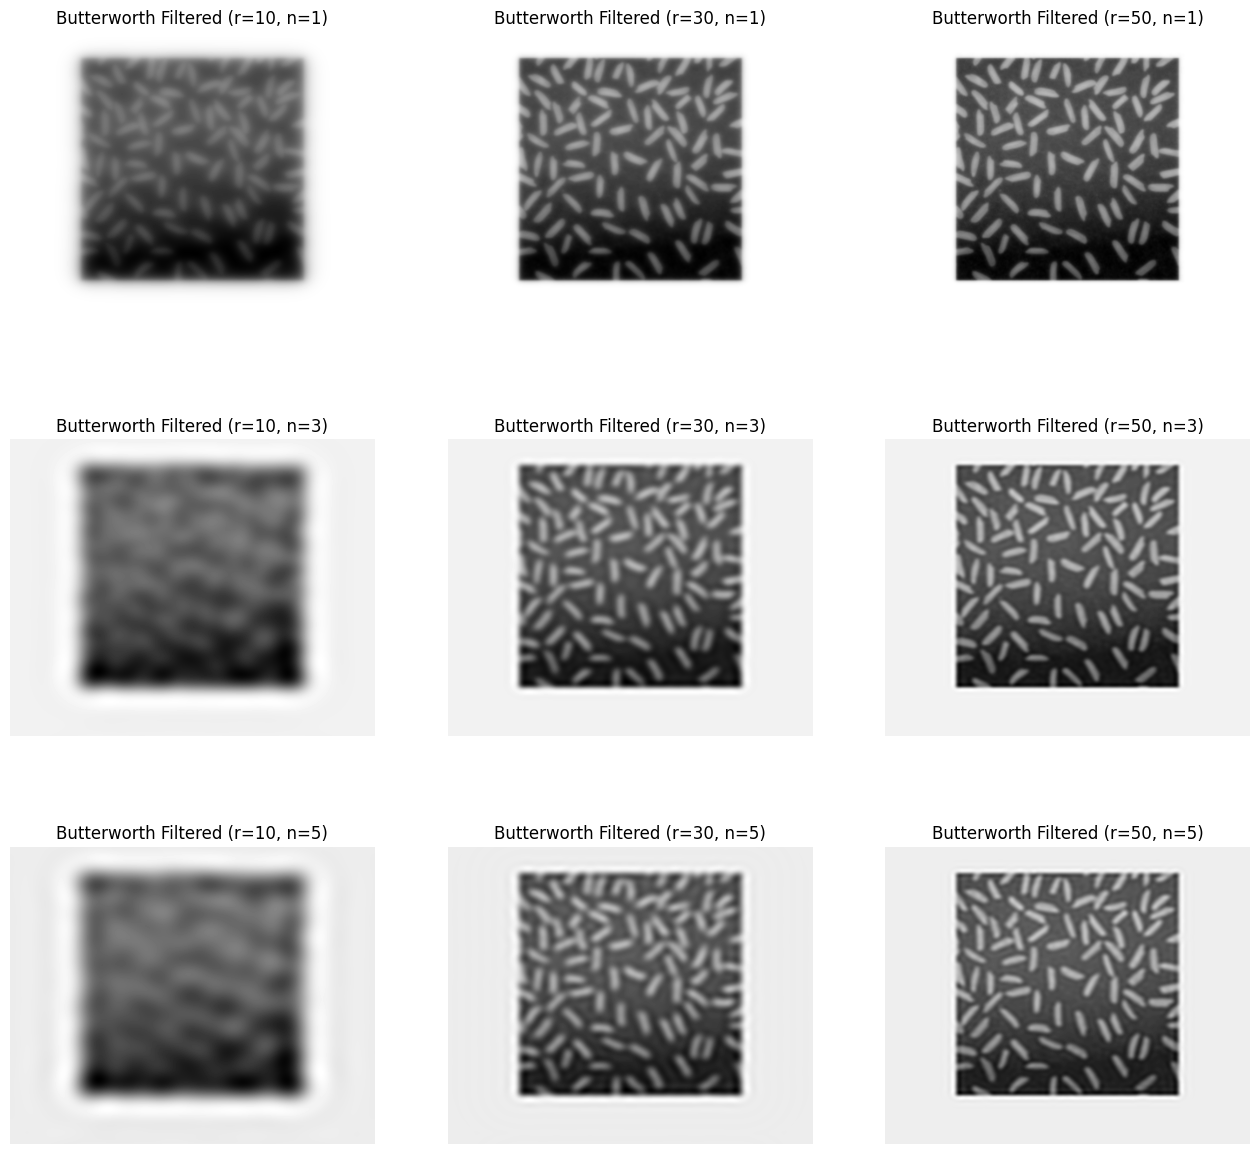

In [14]:
# plotting the butterworth low pass filter applied images

# create a list of radius values
radius_values = [10, 30, 50]

# create a list of n values
n_values = [1, 3, 5]

# plot the images
plt.figure(figsize=(16,15))

for n in n_values:
    for r in radius_values:
        # apply butterworth low pass filter
        butterworth_filtered = butterworth_lowpass_filter(ricegrains_img, r, n)
        # plot the image
        plt.subplot(3,3,n_values.index(n)*3+radius_values.index(r)+1)
        plt.imshow(butterworth_filtered, cmap='gray')
        plt.axis(False)
        plt.title("Butterworth Filtered (r={}, n={})".format(r,n))

plt.show()

In [15]:
# gaussian low pass filter

def gaussian_lowpass_filter(img, radius):
    '''
    Applies gaussian low pass filter on the given image.
    '''
    # extract the image dimensions
    h,w = img.shape
    
    # apply fourier transform
    fshift = np.fft.fftshift(np.fft.fft2(img))

    # create the gaussian low pass filter
    H = np.zeros((h,w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            # calculate the distance of each pixel from the center
            distance = np.sqrt((i-h//2)**2 + (j-w//2)**2)
            # calculate the gaussian low pass filter
            H[i,j] = np.exp(-distance**2 / (2*radius**2))
    
    # apply the filter
    fshift_filtered = fshift * H

    # apply inverse fourier transform
    img_filtered = np.fft.ifft2(fshift_filtered)

    # return the filtered image
    return np.abs(img_filtered)

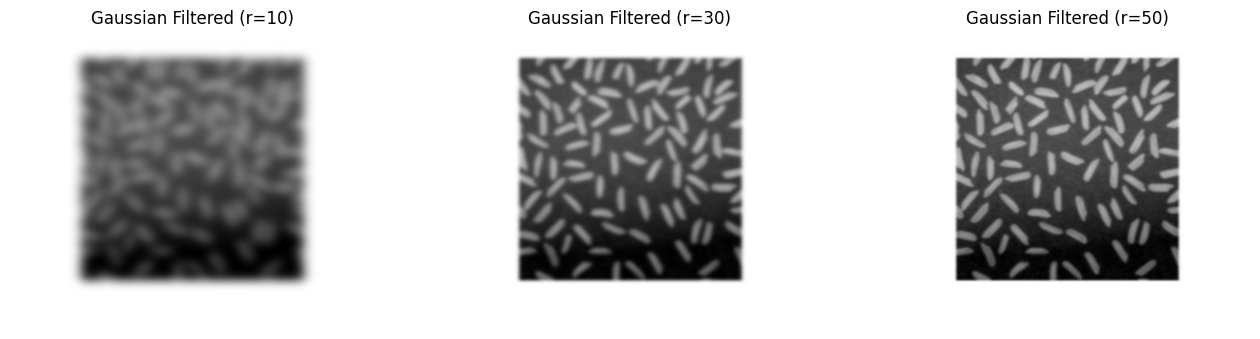

In [16]:
# plotting the gaussian low pass filter applied images

# create a list of radius values
radius_values = [10, 30, 50]

# plot the images
plt.figure(figsize=(16,5))

for r in radius_values:
    # apply gaussian low pass filter
    gaussian_filtered = gaussian_lowpass_filter(ricegrains_img, r)
    # plot the image
    plt.subplot(1,3,radius_values.index(r)+1)
    plt.imshow(gaussian_filtered, cmap='gray')
    plt.axis(False)
    plt.title("Gaussian Filtered (r={})".format(r))

plt.show()

# 5. High Pass Filters

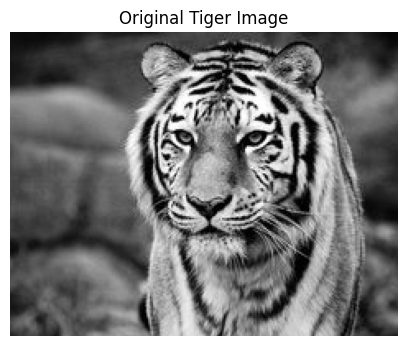

In [19]:
# comparison of high pass filters:
# Spatial Domain Filtering vs Frequency Domain Filtering

# tiger save_path
tiger_save_path = os.path.join('data', 'Images', 'tigerbw.jpg')

# read and print the tiger image
tiger_img = cv2.imread(tiger_save_path, cv2.IMREAD_GRAYSCALE)
print_image(tiger_img, n_channels=1, isGray=True, title="Original Tiger Image")

## 5.(a) Spatial Domain FIltering

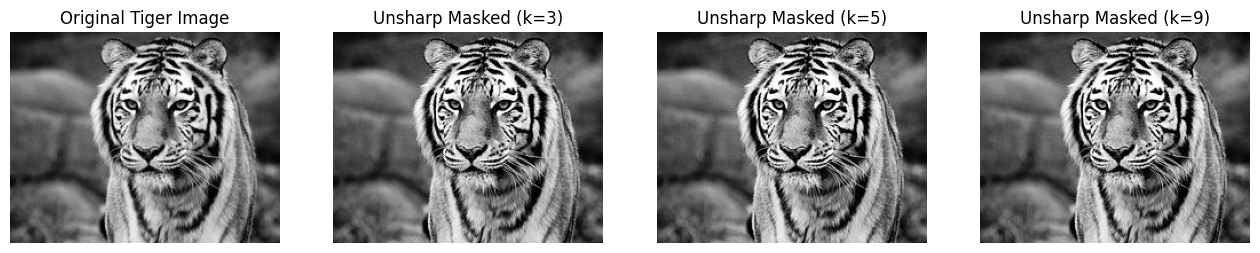

In [30]:
# unsharp masking

# create a list of kernel sizes
kernel_sizes = [3, 5, 9]

# set the sigma value
sigma = 1

# plot the images
plt.figure(figsize=(16,5))

# original image
plt.subplot(141)
plt.imshow(tiger_img, cmap='gray')
plt.axis(False)
plt.title("Original Tiger Image")

for k in kernel_sizes:
    # apply gaussian filter
    gaussian_filtered = cv2.GaussianBlur(tiger_img, (k,k), sigma)
    # apply unsharp masking
    unsharp_masked = cv2.addWeighted(tiger_img, 1.5, gaussian_filtered, -0.5, 0)
    # plot the image
    plt.subplot(1,4,kernel_sizes.index(k)+2)
    plt.imshow(unsharp_masked, cmap='gray')
    plt.axis(False)
    plt.title("Unsharp Masked (k={})".format(k))

plt.show()


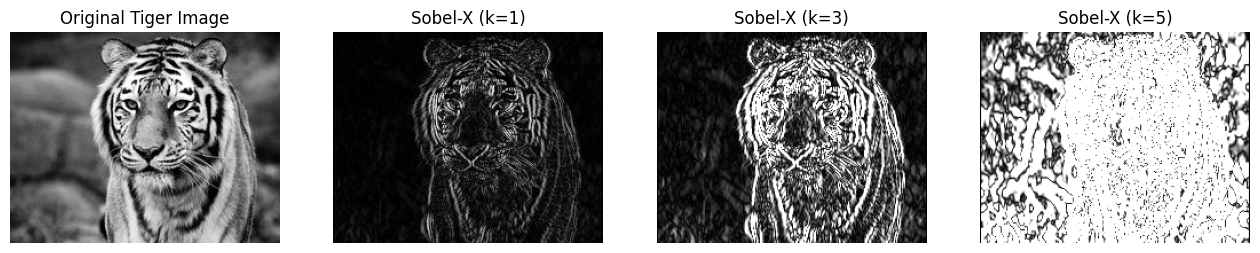

In [33]:
# sobel-x (Sobel Horizontal) edge detection

# create a list of kernel sizes
kernel_sizes = [1, 3, 5]

# plot the images
plt.figure(figsize=(16,5))

# original image
plt.subplot(141)
plt.imshow(tiger_img, cmap='gray')
plt.axis(False)
plt.title("Original Tiger Image")

for k in kernel_sizes:
    # apply sobel-x edge detection
    sobelx = cv2.Sobel(tiger_img, cv2.CV_64F, 1, 0, ksize=k)
    # convert the image to 8-bit for display
    sobelx = cv2.convertScaleAbs(sobelx)
    # plot the image
    plt.subplot(1,4,kernel_sizes.index(k)+2)
    plt.imshow(sobelx, cmap='gray')
    plt.axis(False)
    plt.title("Sobel-X (k={})".format(k))

plt.show()

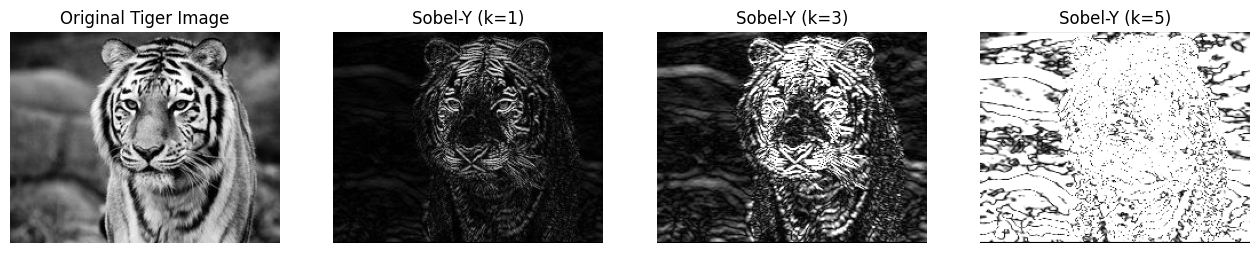

In [35]:
# sobel-y (Sobel Vertical) edge detection

# create a list of kernel sizes
kernel_sizes = [1, 3, 5]

# plot the images
plt.figure(figsize=(16,5))

# original image
plt.subplot(141)
plt.imshow(tiger_img, cmap='gray')
plt.axis(False)
plt.title("Original Tiger Image")

for k in kernel_sizes:
    
    tiger_img = cv2.imread(tiger_save_path, cv2.IMREAD_GRAYSCALE)# apply sobel-y edge detection
    sobely = cv2.Sobel(tiger_img, cv2.CV_64F, 0, 1, ksize=k)
    # convert the image to 8-bit for display
    sobely = cv2.convertScaleAbs(sobely)
    # plot the image
    plt.subplot(1,4,kernel_sizes.index(k)+2)
    plt.imshow(sobely, cmap='gray')
    plt.axis(False)
    plt.title("Sobel-Y (k={})".format(k))

plt.show()

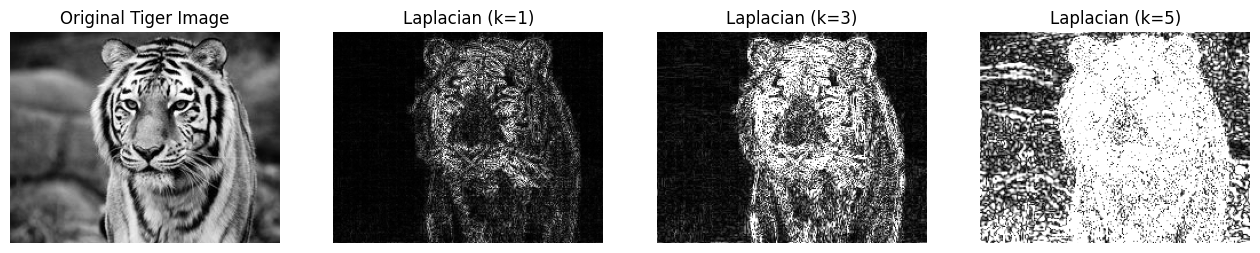

In [36]:
# laplacian edge detection

# create a list of kernel sizes
kernel_sizes = [1, 3, 5]

# plot the images
plt.figure(figsize=(16,5))

# original image
plt.subplot(141)
plt.imshow(tiger_img, cmap='gray')
plt.axis(False)
plt.title("Original Tiger Image")

for k in kernel_sizes:
    # apply laplacian edge detection
    laplacian = cv2.Laplacian(tiger_img, cv2.CV_64F, ksize=k)
    # convert the image to 8-bit for display
    laplacian = cv2.convertScaleAbs(laplacian)
    # plot the image
    plt.subplot(1,4,kernel_sizes.index(k)+2)
    plt.imshow(laplacian, cmap='gray')
    plt.axis(False)
    plt.title("Laplacian (k={})".format(k))

plt.show()

## 5.(b) Frequency Domain FIltering

In [39]:
# butterworth high pass filter

def butterworth_highpass_filter(img, radius, n):
    '''
    Applies a butterworth high pass filter on the given image.
    '''
    # get the image dimensions
    h, w = img.shape

    # apply fourier transform
    fshift = np.fft.fftshift(np.fft.fft2(img))

    # create the butterworth high pass filter
    H = np.zeros((h,w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            # calculate the distance of each pixel from the center
            distance = np.sqrt((i-h//2)**2 + (j-w//2)**2)
            # calculate the butterworth high pass filter
            H[i,j] = 1 / (1 + (radius / distance)**(2*n))
    
    # invert the filter
    H = 1 - H

    # apply the filter
    fshift_filtered = fshift * H

    # apply inverse fourier transform
    img_filtered = np.fft.ifft2(fshift_filtered)

    # return the filtered image
    return np.abs(img_filtered)

/var/folders/xr/w_ff5mfj28v5_lpz552bj4zm0000gn/T/ipykernel_3760/3896377099.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  H[i,j] = 1 / (1 + (radius / distance)**(2*n))


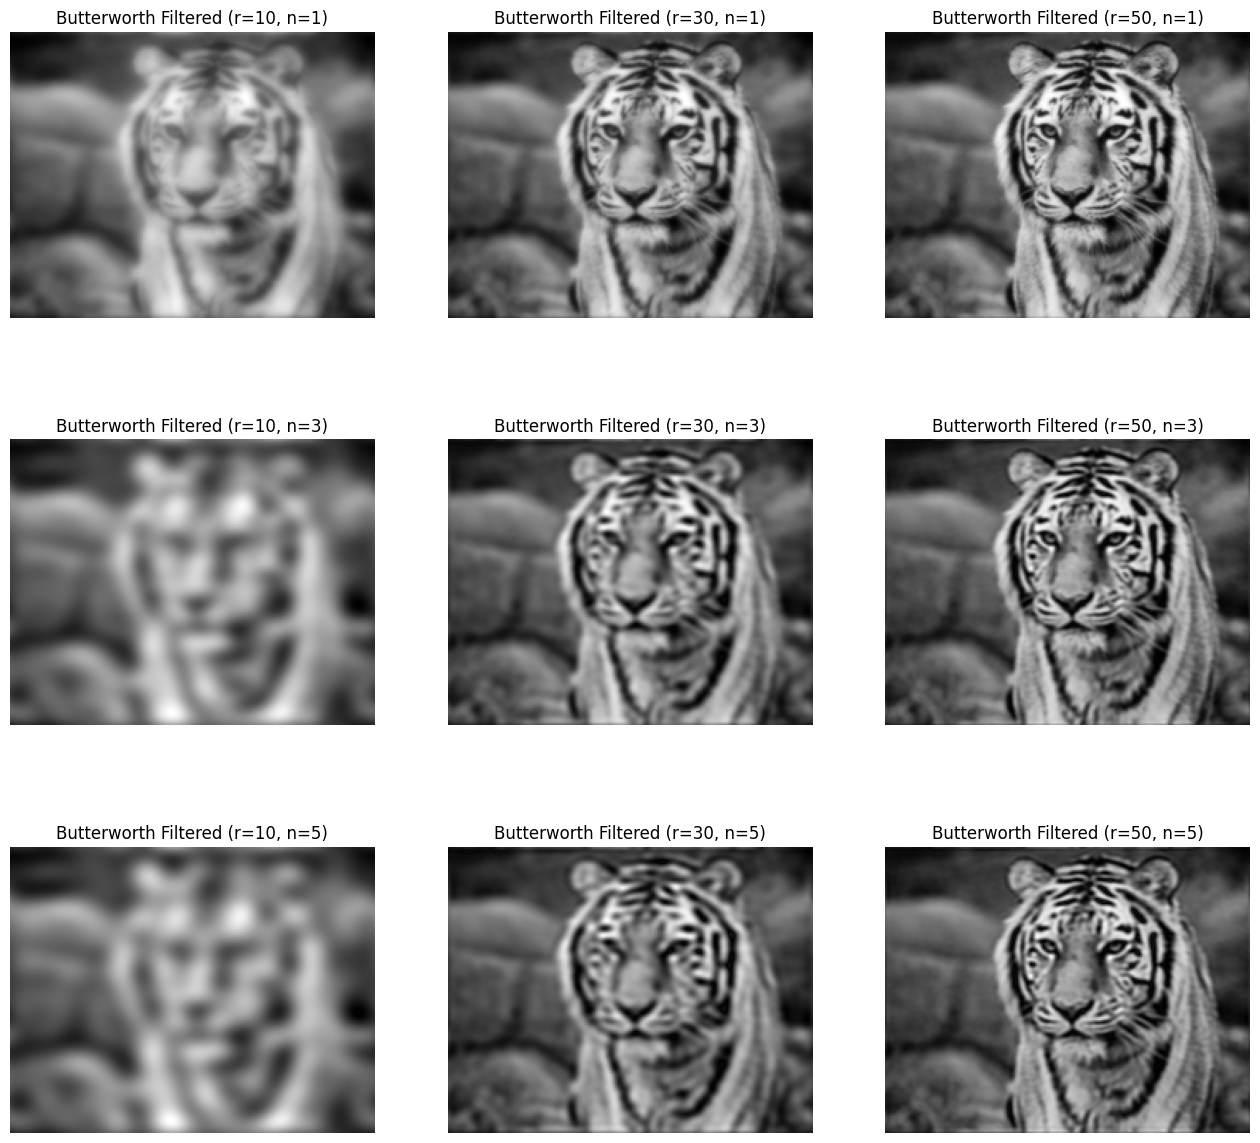

In [38]:
# plotting the butterworth high pass filter applied images

# create a list of radius values
radius_values = [10, 30, 50]

# create a list of n values
n_values = [1, 3, 5]

# plot the images
plt.figure(figsize=(16,15))

for n in n_values:
    for r in radius_values:
        # apply butterworth high pass filter
        butterworth_filtered = butterworth_highpass_filter(tiger_img, r, n)
        # plot the image
        plt.subplot(3,3,n_values.index(n)*3+radius_values.index(r)+1)
        plt.imshow(butterworth_filtered, cmap='gray')
        plt.axis(False)
        plt.title("Butterworth Filtered (r={}, n={})".format(r, n))

plt.show()

In [40]:
# gaussian high pass filter

def gaussian_highpass_filter(img, radius):
    '''
    Applies a gaussian high pass filter on the given image.
    '''
    # get the image dimensions
    h, w = img.shape

    # apply fourier transform
    fshift = np.fft.fftshift(np.fft.fft2(img))

    # create the gaussian high pass filter
    H = np.zeros((h,w), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            # calculate the distance of each pixel from the center
            distance = np.sqrt((i-h//2)**2 + (j-w//2)**2)
            # calculate the gaussian high pass filter
            H[i,j] = 1 - np.exp(-distance**2 / (2 * radius**2))
    
    # invert the filter
    H = 1 - H

    # apply the filter
    fshift_filtered = fshift * H

    # apply inverse fourier transform
    img_filtered = np.fft.ifft2(fshift_filtered)

    # return the filtered image
    return np.abs(img_filtered)

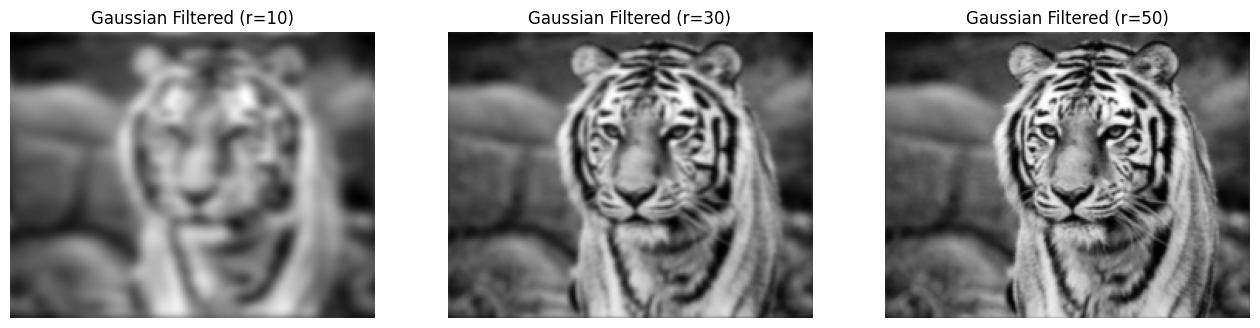

In [41]:
# plotting the gaussian high pass filter applied images

# create a list of radius values
radius_values = [10, 30, 50]

# plot the images
plt.figure(figsize=(16,5))

for r in radius_values:
    # apply gaussian high pass filter
    gaussian_filtered = gaussian_highpass_filter(tiger_img, r)
    # plot the image
    plt.subplot(1,3,radius_values.index(r)+1)
    plt.imshow(gaussian_filtered, cmap='gray')
    plt.axis(False)
    plt.title("Gaussian Filtered (r={})".format(r))

plt.show()

# 6.

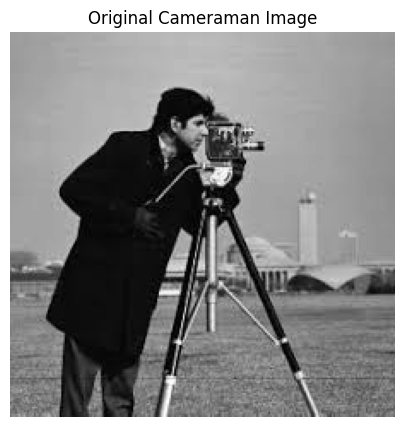

In [3]:
# convolution in spatial and frequency domain

# cameraman save_path
cameraman_save_path = os.path.join('data', 'Images', 'cameraman.jpg')

# read and print the cameraman image
cameraman_img = cv2.imread(cameraman_save_path, cv2.IMREAD_GRAYSCALE)
print_image(cameraman_img, n_channels=1, isGray=True, title="Original Cameraman Image")

## 6.(a)

Time taken: 0.004442 seconds


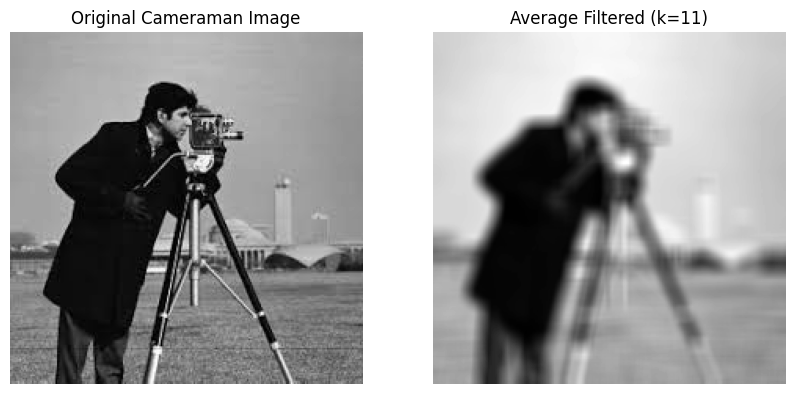

In [4]:
# average filter in spatial domain (kernel size = 11)

# kernel size
kernel_size = 11

# create the average filter
average_filter = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size**2)

# track the time
start_time = time.time()

# apply the filter
average_filtered = cv2.filter2D(cameraman_img, -1, average_filter)

end_time = time.time()

t1 = end_time - start_time

# print the time taken
print("Time taken: {} seconds".format(np.round(t1, 6)))

# plot the images side by side
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.imshow(cameraman_img, cmap='gray')
plt.axis(False)
plt.title("Original Cameraman Image")

plt.subplot(122)
plt.imshow(average_filtered, cmap='gray')
plt.axis(False)
plt.title("Average Filtered (k={})".format(kernel_size))

plt.show()

## 6.(b)

In [5]:
def pad_image(img, h_new, w_new):
    '''
    Pads the given image with zero to the given dimensions.
    '''
    # get the image dimensions
    h, w = img.shape

    # create a new image
    img_new = np.zeros((h_new, w_new), dtype=np.float16)

    # copy the image to the new image
    img_new[:h,:w] = img

    # return the new image
    return img_new

Time taken: 0.000757 seconds


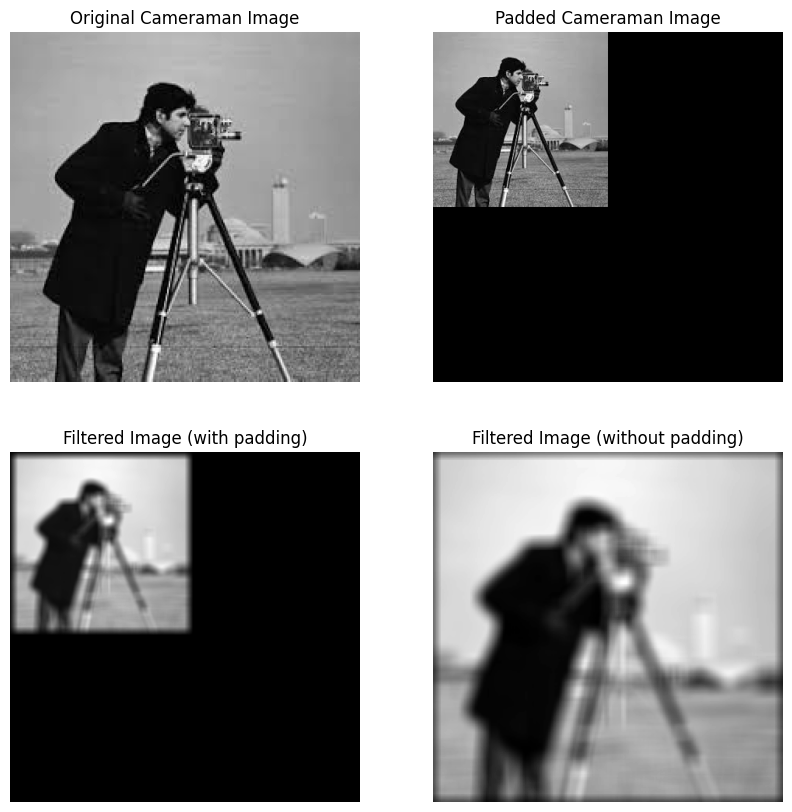

In [6]:
# performing convolution in frequency domain (of the same image and average filter)

# get the image dimensions
h, w = cameraman_img.shape

# get new image dimensions
h_new, w_new = 2*h, 2*w

# pad the image
cameraman_padded_img = pad_image(cameraman_img, h_new, w_new)
# pad the average filter
average_filter_padded = pad_image(average_filter, h_new, w_new)

# apply fourier transform on the padded image
cameraman_fshift = np.fft.fftshift(np.fft.fft2(cameraman_padded_img))
# apply fourier transform on the padded average filter
average_filter_fshift = np.fft.fftshift(np.fft.fft2(average_filter_padded))

# track the time
start_time = time.time()

# apply convolution in frequency domain
conv_fshift = np.multiply(cameraman_fshift, average_filter_fshift)

end_time = time.time()
t2 = end_time - start_time

# print the time taken
print("Time taken: {} seconds".format(np.round(t2, 6)))

# apply inverse fourier transform
transformed_spatial = np.abs(np.fft.ifft2(conv_fshift)).astype(np.uint8)
transformed_spatial_cut = transformed_spatial[kernel_size//2:h+kernel_size//2, kernel_size//2:w+kernel_size//2]

# plot the images side by side
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(cameraman_img, cmap='gray')
plt.axis(False)
plt.title("Original Cameraman Image")

plt.subplot(222)
plt.imshow(cameraman_padded_img, cmap='gray')
plt.axis(False)
plt.title("Padded Cameraman Image")

plt.subplot(223)
plt.imshow(transformed_spatial, cmap='gray')
plt.axis(False)
plt.title("Filtered Image (with padding)")

plt.subplot(224)
plt.imshow(transformed_spatial_cut, cmap='gray')
plt.axis(False)
plt.title("Filtered Image (without padding)")

plt.show()

## 6.(c)

Time taken for convolution in spatial domain: 0.004442 seconds
Time taken for convolution in frequency domain: 0.000757 seconds
Ratio: 5.868031


Text(0.5, 1.0, 'Filtered Image (without padding)')

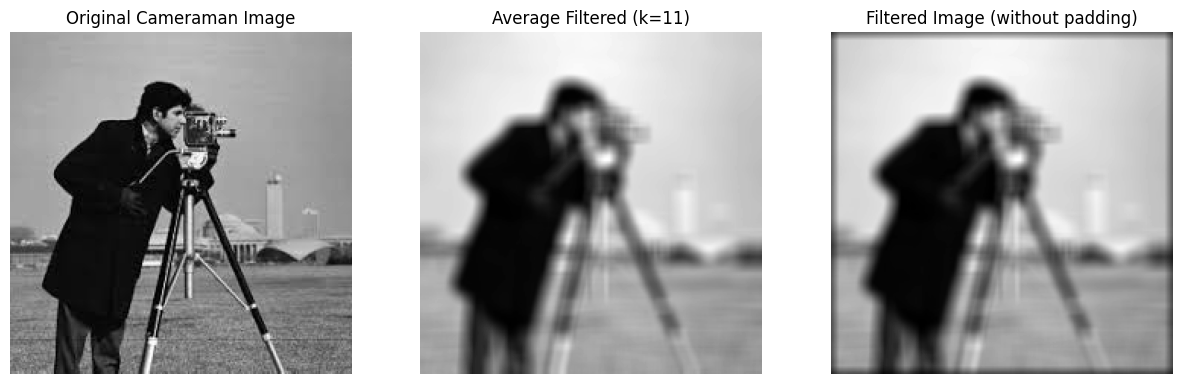

In [7]:
# comparing times required for convolution in spatial and frequency domain

# print the times
print("Time taken for convolution in spatial domain: {} seconds".format(np.round(t1, 6)))

print("Time taken for convolution in frequency domain: {} seconds".format(np.round(t2, 6)))

# print the ratio
print("Ratio: {}".format(np.round(t1/t2, 6)))

# comparing the filtered images

# plot the images side by side
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(cameraman_img, cmap='gray')
plt.axis(False)
plt.title("Original Cameraman Image")

plt.subplot(132)
plt.imshow(average_filtered, cmap='gray')
plt.axis(False)
plt.title("Average Filtered (k={})".format(kernel_size))

plt.subplot(133)
plt.imshow(transformed_spatial_cut, cmap='gray')
plt.axis(False)
plt.title("Filtered Image (without padding)")